- Reference
  - https://blog.amedama.jp/entry/2019/01/29/235642
  - 特徴量の重要度を可視化

In [1]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
#from sklearn.metrics import accuracy_score
from matplotlib import pyplot as plt

In [2]:
import xgboost as xgb

In [3]:
#dataset = datasets.load_breast_cancer()
dataset = datasets.load_iris()
X, y = dataset.data, dataset.target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, shuffle=True, random_state=42, stratify=y)

In [4]:
# dtrain = xgb.DMatrix(X_train, label=y_train)
# dtest = xgb.DMatrix(X_test, label=y_test)
dtrain = xgb.DMatrix(
    X_train, label=y_train, feature_names=dataset.feature_names)
dtest = xgb.DMatrix(
    X_test, label=y_test, feature_names=dataset.feature_names)

In [5]:
xgb_params = {
#     'objective': 'binary:logistic',
#     'eval_metric': 'logloss',
    'objective': 'multi:softmax',
    'num_class': 3,
    'eval_metric': 'mlogloss',
}

evals = [(dtrain, 'train'), (dtest, 'eval')]
evals_result = {}

bst = xgb.train(xgb_params,
                dtrain,
                num_boost_round=1000,
                early_stopping_rounds=10,
                evals=evals,
                evals_result=evals_result)

[0]	train-mlogloss:0.74229	eval-mlogloss:0.76578
Multiple eval metrics have been passed: 'eval-mlogloss' will be used for early stopping.

Will train until eval-mlogloss hasn't improved in 10 rounds.
[1]	train-mlogloss:0.53065	eval-mlogloss:0.56586
[2]	train-mlogloss:0.39291	eval-mlogloss:0.44111
[3]	train-mlogloss:0.29864	eval-mlogloss:0.35772
[4]	train-mlogloss:0.23161	eval-mlogloss:0.30303
[5]	train-mlogloss:0.18313	eval-mlogloss:0.26998
[6]	train-mlogloss:0.14774	eval-mlogloss:0.24459
[7]	train-mlogloss:0.12119	eval-mlogloss:0.22865
[8]	train-mlogloss:0.10136	eval-mlogloss:0.21806
[9]	train-mlogloss:0.08644	eval-mlogloss:0.20913
[10]	train-mlogloss:0.07479	eval-mlogloss:0.20622
[11]	train-mlogloss:0.06401	eval-mlogloss:0.20976
[12]	train-mlogloss:0.05654	eval-mlogloss:0.20498
[13]	train-mlogloss:0.05095	eval-mlogloss:0.20384
[14]	train-mlogloss:0.04637	eval-mlogloss:0.19950
[15]	train-mlogloss:0.04319	eval-mlogloss:0.19810
[16]	train-mlogloss:0.03985	eval-mlogloss:0.19591
[17]	trai

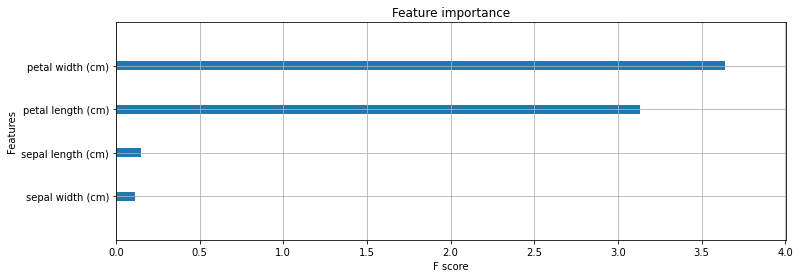

In [6]:
_, ax = plt.subplots(figsize=(12, 4))

xgb.plot_importance(bst,
                    ax=ax,
                    importance_type='gain',
                    show_values=False)

plt.show()